## Problem Statement

 - We have a Goal to predict the more accurate method of predicting outbreaks of West Nile virus in mosquitos will help the City of Chicago and CPHD more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus.

##  Executive Summary

In 2002, the first human cases of West nile virus were reported and CDPH(Chicago Department of Public Health has established a comprehensive surveillance and control program that is still in effect today. The traps collects mosquitos, and the mosquitos are tested for the presence of West Nile virus before the end of the week. The traps are placed at specific location every year. Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

- Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220.
- Goal over here is to predict the more accurate method of predicting outbreaks of West Nile virus in mosquitos will help the City of Chicago and CPHD more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus.


## Data Dictionary

#### Weather dataset has Station 1 and Station 2 weather information 
`'Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev:662 ft.above sea level'`\

'`Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level'`

Dataset used in thie project is included as train.csv and weather.csv..

train.csv - `'2007, 2009, 2011,2013'`

- `'Id'`: the id of the record -Test only 
- `'Date'`: date that the WNV test is performed
- `'Address'`: approximate address of the location of trap. This is used to send to the GeoCoder.
- `'Species'`: the species of mosquitos
- `'Block'`: block number of address
- `'Street'`: street name
- `'Trap'`: Id of the trap
- `'AddressNumberAndStreet'`: approximate address returned from GeoCoder
- `'Latitude, Longitude: Latitude and Longitude'` returned from GeoCoder
- `'AddressAccuracy'`: accuracy returned from GeoCoder
- `'NumMosquitos'`: number of mosquitoes caught in this trap
- `'WnvPresent'`: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present.

Test Data - `'2008,2010,2012,2014'`
-  `'Id'`: the id of the record 
- `'Date'`: date that the WNV test is performed
- `'Address'`: approximate address of the location of trap. This is used to send to the GeoCoder.
- `'Species'`: the species of mosquitos
- `'Block'`: block number of address
- `'Street'`: street name
- `'Trap'`: Id of the trap
- `'AddressNumberAndStreet'`: approximate address returned from GeoCoder
- `'Latitude, Longitude: Latitude and Longitude'` returned from GeoCoder
- `'AddressAccuracy'`: accuracy returned from GeoCoder

Weather Data - `'2007 to 2014'`
- `'Station'`: station ID
- `'Date'`: date of weather recorded
- `'Tmax, Tmin'`, Tave: temperature in Fahrenheit
- `'Depart'`: departure from normal
- `'DewPoint'`: average dew point
- `'WetBulb'`: average wet bulb
- `'Heat, Cool'`: index
- `'Sunrise, Sunset'`: calculated, not observed
- `'PrecipTotal'`: precipitation in inches
- `'SnowFall'`: snow on ground in inches
- `'StnPressure'`: average station pressure
- `'Sealevel'`: average seal level pressure
- `'ResultSpeed, ResultDir, AvgSpeed'`: wind speed in mph, direction in degrees

Spray Data `'2011,2013'`
- `'Date'`: date of spray
- `'Time'`: time of spray
- `'Latitude'`: latitude of spray
- `'Longitude'`: longitude of spray

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', 999)
pd.set_option('max_rows', 999)

from math import radians, sin, cos, atan2, sqrt

%matplotlib inline

In [2]:
# Read the datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
spray = pd.read_csv('./data/spray.csv')
weather=pd.read_csv('./data/weather.csv')

In [3]:
# Shape of the datasets available
print('train shape{}' .format(train.shape))
print('test shape{}'.format(test.shape))
print('weather shape{}' .format(weather.shape))
print('spray shape{}' .format(spray.shape))

train shape(10506, 12)
test shape(116293, 11)
weather shape(2944, 22)
spray shape(14835, 4)


In [4]:
# finding the null values in the datasets 
print('Train null values{}' .format(train.isnull().sum()))
print('------------------------------------------------')
print('Test null values{}' .format(train.isnull().sum()))
print('------------------------------------------------')
print('Weather null values{}' .format(train.isnull().sum()))
print('------------------------------------------------')
print('Spray null values{}' .format(train.isnull().sum()))

Train null valuesDate                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
------------------------------------------------
Test null valuesDate                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
------------------------------------------------
Weather null valuesDate                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap        

In [5]:
#  With noaa_weather_qclcd_documentation%20(1).pdf given with the data set, Missing values 
# imputated with M and Trace. Exploring the datasets features
display(train.head(5))

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
# Check the null values.
# Data contains Date, Address, Species, blk, Street, AddressNumberand Street, latitude, longitude,
# Address accuracy, NumMosquitos, WnvPresent
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [7]:
# dropping the columns which adress,block,street, AddressNumberAndStreet n AddressAccuracy as
# latitude and longitude will have information contain in it
train.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'],axis=1,inplace=True)

In [8]:
train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


In [9]:
train['Date'].nunique()

95

In [10]:
# We will keep the relavent information 
display(test.head(5))

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [11]:
# Test dataset is similar to Train datset except Id, NMosquitos and WnvPresent. We will keep the 
# longitude n latitude column as a location information of traps and remove the rest
test.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'],axis=1,inplace=True)

In [12]:
test.head()

,Id,Date,Species,Trap,Latitude,Longitude
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991


#### Weather dataset has Station 1 and Station 2 weather information 
- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [13]:
# Exploring the weather data
display(weather.head(5))

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


#### There are 22 features of weather, we will take a closer look at each of the feature and decide to keep which will help in prediction and  drop some which are correlated features. 

In [14]:
# WATER EQUIVALENT IN INCHES , T = TRACE PRECIPITATION AMOUNT,  M = MISSING DATA
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [15]:
# M = Missing Data, or data that are not normally reported for the station.
# - = values not available for sunrise/sunset. 
# Imputate the values with Nan to see how much information is missing
weather.replace(['M','  T',' '], np.nan,inplace=True)

In [16]:
display(weather.head())

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,NaN,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,NaN,51,57,0,3,-,-,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,NaN,42,47,13,0,-,-,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,NaN,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [17]:
display(weather.isnull().sum())

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise           0
Sunset            0
CodeSum        1609
Depth          1472
Water1         2944
SnowFall       1484
PrecipTotal     320
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

-  Tmin and Tmax as Tavg is average of Tmin and Tmax
-  Heating(Begins with July) and Cooling(begind with July)
- Sunrise and Sunset (Calculated not observed)
- Average Dew point(Dewpoint) and average bulb(WetBulb)
- CodeSum (weather phenomenon)
- Depth, Water1, SnowFall, Precipitation Total
- Water Equivalent 
- Average Station Pressure
- Average Sealevel pressure # Result Speed, ResultDirection and Average Speed
https://www.engineeringtoolbox.com/dry-wet-bulb-dew-point-air-d_682.html


In [18]:
def value_count(df,lst):
    for i in lst:
        print('Value count of {}'.format(i))
        value_count = df[i].unique()
        print(value_count)

In [19]:
lst_col = ['CodeSum','Depth','SnowFall','Depart','Water1','Sunrise','Sunset']

In [20]:
# value count
value_count(weather,lst_col)

Value count of CodeSum
[nan 'BR' 'BR HZ' 'HZ' 'RA' 'RA BR' 'TSRA RA BR' 'RA VCTS' 'TSRA RA'
 'RA HZ' 'TSRA RA BR HZ' 'TSRA BR HZ' 'RA BR HZ VCTS' 'TSRA RA HZ'
 'TSRA BR HZ VCTS' 'TSRA' 'TSRA BR HZ FU' 'TSRA RA HZ FU' 'BR HZ FU'
 'TSRA RA VCTS' 'HZ VCTS' 'TSRA HZ' 'VCTS' 'RA BR VCTS' 'TSRA RA BR VCTS'
 'TS TSRA RA BR HZ VCTS' 'DZ BR' 'TS TSRA RA BR HZ' 'TS TSRA BR HZ'
 'RA BR HZ' 'TSRA RA DZ BR HZ' 'TS TSRA RA BR' 'TS RA BR' 'TS TSRA RA'
 'TS TSRA RA BR VCTS' 'TS TSRA BR' 'TS RA' 'RA BCFG BR' 'TSRA BR'
 'RA DZ FG+ BCFG BR' 'RA FG+ MIFG BR' 'RA DZ' 'RA DZ BR' 'TS TSRA RA HZ'
 'TSRA RA FG+ FG BR' 'TSRA DZ FG+ FG BR HZ' 'TS BR' 'RA BR SQ' 'TS TSRA'
 'TSRA RA BR HZ VCTS' 'BR VCTS' 'TS' 'FG+ BR HZ' 'RA SN' 'TSRA RA DZ BR'
 'DZ BR HZ' 'RA BR FU' 'TS BR HZ' 'DZ' 'FG+ BR' 'FG+ FG BR' 'FG+ MIFG BR'
 'TSRA RA FG BR' 'TSRA FG+ BR' 'RA DZ BR HZ' 'RA DZ SN' 'FG+ FG BR HZ'
 'TS TSRA RA FG BR' 'BR HZ VCFG' 'TS RA FG+ FG BR' 'TSRA RA FG+ BR'
 'RA DZ FG+ FG BR' 'TS TSRA RA VCTS' 'FU' 'TS TSRA VCFG' 'TS 

In [21]:
# CodeSum has many values based on the weather condition - we can drop this
# Depth & Snowfall has Nan or 0 which doesn't seems to value add - decided to drop
# Depart has value related to departure from normal temprature - decide to drop
# Water1 has all null values - decided to drop
# Sunrise and Sunset are observed values - decided to drop 
weather.drop(lst_col,axis=1,inplace=True)

In [22]:
print(weather.isnull().sum())
print('------------------------')
print(weather.dtypes)

Station          0
Date             0
Tmax             0
Tmin             0
Tavg            11
DewPoint         0
WetBulb          4
Heat            11
Cool            11
PrecipTotal    320
StnPressure      4
SeaLevel         9
ResultSpeed      0
ResultDir        0
AvgSpeed         3
dtype: int64
------------------------
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object


In [23]:
# weather.drop('Water1')
lst = ['Tavg','WetBulb','Heat','Cool','PrecipTotal','StnPressure','SeaLevel','AvgSpeed']
value_count(weather,lst)

Value count of Tavg
['67' '68' '51' '52' '56' '58' nan '60' '59' '65' '70' '69' '71' '61' '55'
 '57' '73' '72' '53' '62' '63' '74' '75' '78' '76' '77' '66' '80' '64'
 '81' '82' '79' '85' '84' '83' '50' '49' '46' '48' '45' '54' '47' '44'
 '40' '41' '38' '39' '42' '37' '43' '86' '87' '89' '92' '88' '91' '93'
 '94' '90' '36']
Value count of WetBulb
['56' '57' '47' '48' '50' '49' '46' '54' '53' '62' '63' '60' '61' '51'
 '59' '58' '43' '44' '45' '65' '66' '67' '64' '52' '55' '69' '68' '70'
 '72' '71' '73' '74' '76' '42' '39' '40' '41' '35' '33' '34' nan '75' '36'
 '32' '38' '78' '77' '37']
Value count of Heat
['0' '14' '13' '9' '7' nan '5' '6' '4' '10' '8' '12' '3' '2' '1' '15' '16'
 '19' '17' '20' '11' '18' '21' '25' '24' '27' '26' '23' '28' '22' '29']
Value count of Cool
[' 2' ' 3' ' 0' nan ' 5' ' 4' ' 6' ' 8' ' 7' ' 9' '10' '13' '11' '12' ' 1'
 '15' '16' '17' '14' '20' '19' '18' '21' '22' '24' '27' '23' '26' '28'
 '29' '25']
Value count of PrecipTotal
['0.00' nan '0.13' '0.02' '0.38' '0.

https://www.wunderground.com/maps/precipitation/daily
https://www.weather.gov/gyx/WindSpeedAndDirection
https://en.wikipedia.org/wiki/Precipitation
https://forecast.weather.gov/glossary.php?word=Sea%20Level%20Pressure

- Dry Bulb Temperature - Tdb
The Dry Bulb temperature, usually referred to as "air temperature", is the air property that is most commonly used. When people refer to the temperature of the air they are normally referring to the dry bulb temperature.
- The Wet Bulb temperature is the adiabatic saturation temperature.
Wet Bulb temperature can be measured by using a thermometer with the bulb wrapped in wet muslin. The adiabatic evaporation of water from the thermometer bulb and the cooling effect is indicated by a "wet bulb temperature" lower than the "dry bulb temperature" in the air.
- Dew Point Temperature - Tdp
The Dew Point is the temperature where water vapor starts to condense out of the air (the temperature at which air becomes completely saturated). Above this temperature the moisture stays in the air.
- Sunrise and Sunset are observed value not useful for our prediction
- Heat and Cool is related to Wetbulb -
- Preciptation - 
Precipitation occurs when a portion of the atmosphere becomes saturated with water vapor (reaching 100% relative humidity), so that the water condenses and "precipitates" or falls.
- StnPressure - 
STATION PRESSURE: This is the pressure that is observed at a specific elevation and is the true barometric pressure of a location. I 
- SeaLevel  
This is the pressure reading most commonly used by meteorologists to track weather systems at the surface.
- ResultSpeed     
Resulted speed of the wind
- ResultDir       
Resulted Direction
- AvgSpeed         
Average Speed of the wind

In [24]:
# Decided to imputate the null values with median value
for col in lst:
    median = weather[col].median()
    null_col = weather[col].isnull()
    weather[col].loc[null_col] = median
    weather[col] = weather[col].astype(float)
# print null
print(weather.isnull().sum())
# print col
display(weather.dtypes)
# Display the weather imputation
display(weather.describe())

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64


C:\Users\vijan\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb        float64
Heat           float64
Cool           float64
PrecipTotal    float64
StnPressure    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
dtype: object

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,67.246603,53.457880,59.313179,3.394361,5.640965,0.131240,29.284423,29.968135,6.960666,17.494905,8.579959
std,0.500085,11.461970,10.381939,10.526264,10.675181,9.280637,5.945704,6.094496,0.393208,0.158436,0.158354,3.587527,10.063609,3.145733
min,1.000000,41.000000,29.000000,36.000000,22.000000,32.000000,0.000000,0.000000,0.000000,28.550000,29.230000,0.100000,1.000000,1.700000
25%,1.000000,69.000000,50.000000,60.000000,46.000000,53.000000,0.000000,0.000000,0.000000,29.190000,29.870000,4.300000,7.000000,6.300000
50%,1.500000,78.000000,59.000000,69.000000,54.000000,61.000000,0.000000,4.000000,0.000000,29.280000,29.970000,6.400000,19.000000,8.100000
75%,2.000000,85.000000,66.000000,75.000000,62.000000,67.000000,5.000000,10.000000,0.060000,29.390000,30.060000,9.200000,25.000000,10.400000
max,2.000000,104.000000,83.000000,94.000000,75.000000,78.000000,29.000000,29.000000,6.860000,29.860000,30.530000,24.100000,36.000000,26.300000


## EDA (Exploratory Data analysis)
https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07


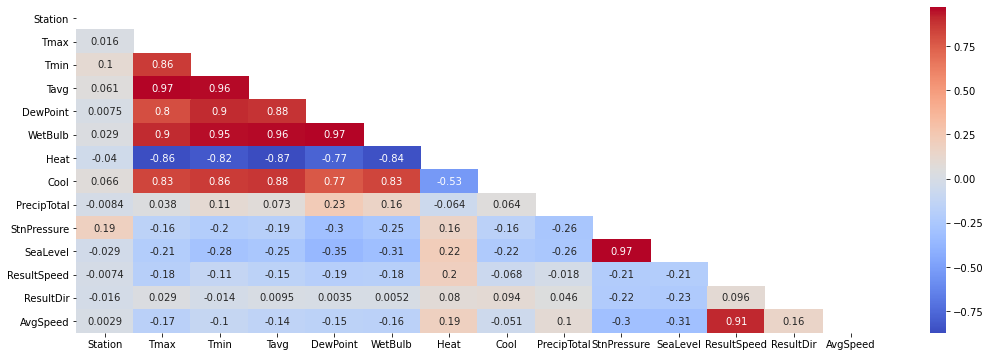

In [25]:
## Heat map is the good way of finding the correlation
plt.figure(figsize=(18,6))
matrix = np.triu(weather.corr())
sns.heatmap(weather.corr(), annot=True, mask=matrix, cmap='coolwarm',linecolor='black')

In [26]:
# We can see from the heatplt Tmin, Tmax and Tavg and Dewpoint and WetBulbare highly correlated, we will keep
# only Tavg for modelling purpose
## Heat negatively  and Cool positively correlated figures which we cal drop 
## Sealevel and StnPressure are highly correlated so we drop SeaLevel
## Result Speed and Avgspeed are correlated so we will keep AvgSpeed and drop ResultSpeed
drop_col =['Tmin','Tmax','DewPoint','Tavg','Heat','Cool','SeaLevel','ResultSpeed']
weather.drop(drop_col,axis=1, inplace=True)
print(weather.head())

   Station        Date  WetBulb  PrecipTotal  StnPressure  ResultDir  AvgSpeed
0        1  2007-05-01     56.0          0.0        29.10         27       9.2
1        2  2007-05-01     57.0          0.0        29.18         25       9.6
2        1  2007-05-02     47.0          0.0        29.38          4      13.4
3        2  2007-05-02     47.0          0.0        29.44          2      13.4
4        1  2007-05-03     48.0          0.0        29.39          7      11.9


In [27]:
weather.head()

,Station,Date,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed
0,1,2007-05-01,56.0,0.0,29.10,27,9.2
1,2,2007-05-01,57.0,0.0,29.18,25,9.6
2,1,2007-05-02,47.0,0.0,29.38,4,13.4
3,2,2007-05-02,47.0,0.0,29.44,2,13.4
4,1,2007-05-03,48.0,0.0,29.39,7,11.9


In [28]:
# Spray shape
print(spray.shape)
## Spray DataSet 
print(spray.head())
## Check nullvalues
print(spray.isnull().sum())

(14835, 4)
         Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858
Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64


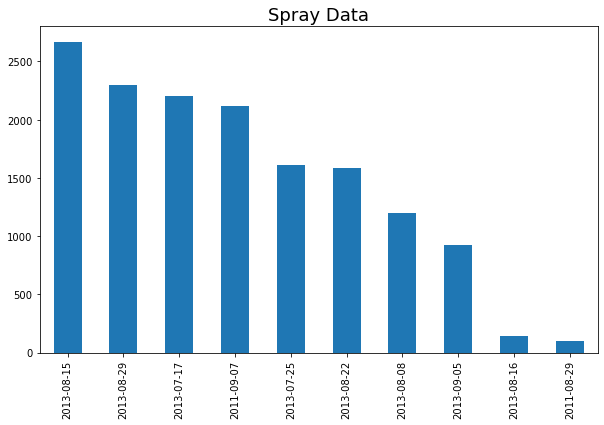

In [29]:
plt.figure(figsize =(10,6))
spray['Date'].value_counts().plot.bar();
plt.title('Spray Data',fontsize=18);

In [30]:
## Spray happened only 10 days in year 2011 and 2013 and training data is not 
## available for those year so decided not to merge with test data.
# We can see from bar plot, the spray has been done for 10 days.
#Month of August and September in 2011, month of July, Aug and September in 2013

In [31]:
# https://www.kaggle.com/jbobtaylor/show-map-image-in-python

In [32]:
# Datafram of the traps and virus present
traps = train[['Date','Species','Trap','NumMosquitos', 'WnvPresent']]
traps.head()
traps = traps.groupby(['Date', 'Trap', 'Species']).max().reset_index()

<ipython-input-33-d52d71c62017>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Trap = train.groupby('Trap')['NumMosquitos','WnvPresent'].sum()


<Figure size 1296x864 with 0 Axes>

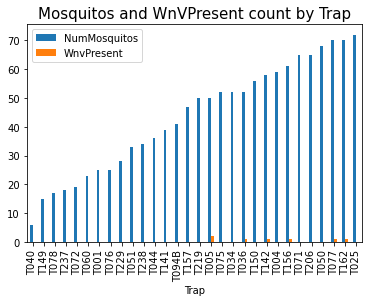

In [33]:
plt.figure(figsize=(18,12))
Trap = train.groupby('Trap')['NumMosquitos','WnvPresent'].sum()
Trap.sort_values('NumMosquitos',ascending=True).head(30).plot.bar()
plt.title("Mosquitos and WnVPresent count by Trap", fontdict={'size': 15});

In [34]:
# We can see some of the Traps like T005,T036,T142,T156,T077,T162 showing the presend of WnvPresent

<ipython-input-35-a6dbfd474024>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('Species')['NumMosquitos','WnvPresent'].sum().plot.bar()


<Figure size 432x576 with 0 Axes>

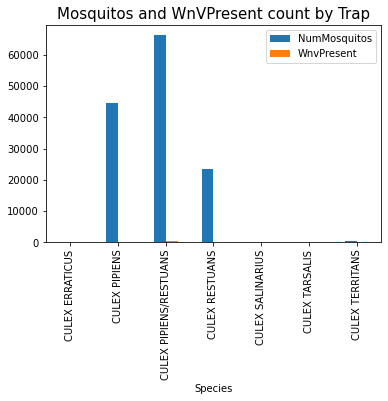

In [35]:
# Number of Mosquitoes per species
plt.figure(figsize=(6,8))
train.groupby('Species')['NumMosquitos','WnvPresent'].sum().plot.bar()
plt.title("Mosquitos and WnVPresent count by Trap", fontdict={'size':15});

In [36]:
# Species Culwx Pipens/Restuans,Culex Restuans and Culex pipiens species are
# main carrier of virus.  

In [37]:
# Convert Date to datetime format and add Year & Month columns
files = [train,weather,test]
for file in files:
    file['Date'] = pd.to_datetime(file['Date'], format='%Y-%m-%d' )
    file['Year'] = file['Date'].dt.year
    file['Month'] = file['Date'].dt.month
    file['Day'] = file['Date'].dt.day

In [38]:
# Training set data : Year 2007,2011,2009, 2013
# Test Data : Year 2008, 2010, 2012, 2014
# Spray Data : Year 2011 and 2013
# Weather data: Year 2007-2014 

Text(0.5, 1.0, 'Weather Data')

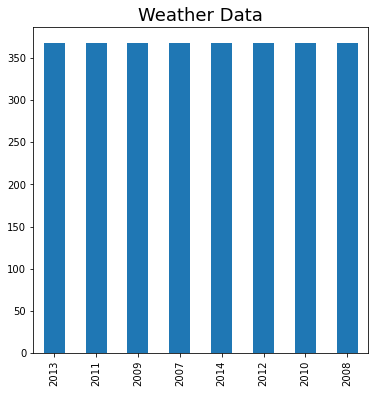

In [39]:
plt.figure(figsize =(6,6))
weather['Year'].value_counts().plot.bar();
plt.title('Weather Data',fontsize=18)

Text(0.5, 1.0, 'Train Data')

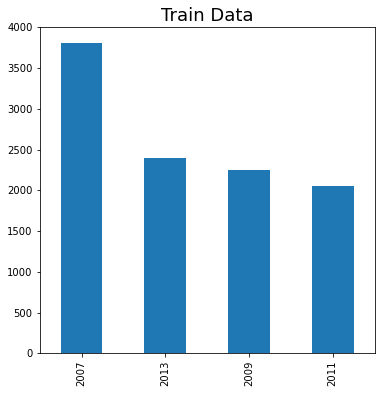

In [40]:
plt.figure(figsize =(6,6))
train['Year'].value_counts().plot.bar();
plt.title('Train Data',fontsize=18)

Text(0.5, 1.0, 'Train Data')

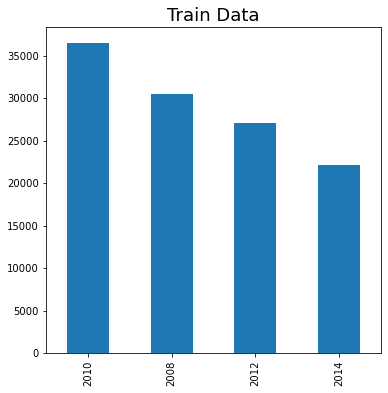

In [41]:
plt.figure(figsize =(6,6))
test['Year'].value_counts().plot.bar();
plt.title('Train Data',fontsize=18)

##### Prepare the data for modeling:

- Combine Station1 & Station2 weather data by Date
- Combine Train and Weather data by Date
- Process Categorical Featues
- Identify features 

In [42]:
display(weather.head())

,Station,Date,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Year,Month,Day
0,1,2007-05-01,56.0,0.0,29.10,27,9.2,2007,5,1
1,2,2007-05-01,57.0,0.0,29.18,25,9.6,2007,5,1
2,1,2007-05-02,47.0,0.0,29.38,4,13.4,2007,5,2
3,2,2007-05-02,47.0,0.0,29.44,2,13.4,2007,5,2
4,1,2007-05-03,48.0,0.0,29.39,7,11.9,2007,5,3


In [43]:
display(train.head())

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Day
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007,5,29
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,2007,5,29
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,2007,5,29
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007,5,29
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,2007,5,29


In [44]:
display(test.head())

,Id,Date,Species,Trap,Latitude,Longitude,Year,Month,Day
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,6,11
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,2008,6,11
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,2008,6,11
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,2008,6,11
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,2008,6,11


In [45]:
weather.tail()

,Station,Date,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Year,Month,Day
2939,2,2014-10-29,42.0,0.00,29.42,29,9.0,2014,10,29
2940,1,2014-10-30,40.0,0.00,29.34,24,5.5,2014,10,30
2941,2,2014-10-30,42.0,0.00,29.41,23,6.5,2014,10,30
2942,1,2014-10-31,33.0,0.03,29.49,34,22.9,2014,10,31
2943,2,2014-10-31,36.0,0.04,29.54,34,22.6,2014,10,31


In [46]:
train.shape

(10506, 10)

In [47]:
test.shape

(116293, 9)

In [48]:
# Set variables for Latitude, Longitude of weather stations 1 & 2
# This will be used to calculate the distance (as the crow flies) between stations and observation points
stn1_location = (41.995,-87.933)
stn2_location = (41.786,-87.752)

def calc_dist_chk(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    #formula calc distance between two points 
    #haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    #distance in km
    distance = R * c
    return round(distance, 4)

def find_nearest_stn(latitude, longitude):
    dist_from_stn1 = calc_dist_chk(latitude, longitude, stn1_location[0], stn1_location[1])
    dist_from_stn2 = calc_dist_chk(latitude, longitude, stn2_location[0], stn2_location[1])
    if dist_from_stn1 <= dist_from_stn2:
        return 1
    else:
        return 2

In [49]:
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
print(weather_stn1.shape)
print(weather_stn2.shape)

(1472, 10)
(1472, 10)


In [50]:
weather_stn2.head()

,Station,Date,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Year,Month,Day
1,2,2007-05-01,57.0,0.0,29.18,25,9.6,2007,5,1
3,2,2007-05-02,47.0,0.0,29.44,2,13.4,2007,5,2
5,2,2007-05-03,50.0,0.0,29.46,6,13.2,2007,5,3
7,2,2007-05-04,50.0,0.0,29.36,7,10.4,2007,5,4
9,2,2007-05-05,50.0,0.0,29.46,7,11.5,2007,5,5


In [51]:
# For each observation (row), check distance to nearest weather station
# Assign 'stn_ref' to the nearest weather station (either 1 or 2)
for index, row in train.iterrows():
    nearest_station = find_nearest_stn(row['Latitude'],row['Longitude'])
    train.loc[index,'stn_ref'] = nearest_station
    
print('Number on train nearest Station 1:',train[train['stn_ref']==1]['stn_ref'].count())
print('Number on train nearest Station 2:',train[train['stn_ref']==2]['stn_ref'].count())

Number on train nearest Station 1: 3298
Number on train nearest Station 2: 7208


In [52]:
train.head(1)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Day,stn_ref
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,2007,5,29,1.0


In [53]:
# For each observation (row), check distance to nearest weather station
# Assign 'stn_ref' to the nearest weather station (either 1 or 2)
for index, row in test.iterrows():
    nearest_station = find_nearest_stn(row['Latitude'],row['Longitude'])
    test.loc[index,'stn_ref'] = nearest_station
    
print('Number on test nearest Station 1:',test[test['stn_ref']==1]['stn_ref'].count())
print('Number on test nearest Station 2:',test[test['stn_ref']==2]['stn_ref'].count())

Number on test nearest Station 1: 35401
Number on test nearest Station 2: 80892


In [54]:
train_station1 = train[train['stn_ref']==1.0]
train_station2 = train[train['stn_ref']==2.0]
print(train_station1.shape)
print(train_station2.shape)

(3298, 11)
(7208, 11)


In [55]:
# Merge Training dataset and Weather Data 
train_merged_stn1 = pd.merge(train_station1, weather_stn1 ,on='Date',how='left')
print(train_merged_stn1.shape)
train_merged_stn1.head(2)

(3298, 20)


,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year_x,Month_x,Day_x,stn_ref,Station,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Year_y,Month_y,Day_y
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,2007,5,29,1.0,1,65.0,0.0,29.39,18,6.5,2007,5,29
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1,0,2007,5,29,1.0,1,65.0,0.0,29.39,18,6.5,2007,5,29


In [56]:
# Merge Training dataset and Weather Data 
train_merged_stn2 = pd.merge(train_station2, weather_stn2 ,on='Date',how='left')
print(train_merged_stn2.shape)
train_merged_stn2.head(2)

(7208, 20)


,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year_x,Month_x,Day_x,stn_ref,Station,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Year_y,Month_y,Day_y
0,2007-05-29,CULEX RESTUANS,T045,41.921600,-87.666455,2,0,2007,5,29,2.0,2,66.0,0.0,29.44,16,7.4,2007,5,29
1,2007-05-29,CULEX RESTUANS,T046,41.891118,-87.654491,1,0,2007,5,29,2.0,2,66.0,0.0,29.44,16,7.4,2007,5,29


In [57]:
test_station1 = test[test['stn_ref']==1.0]
test_station2 = test[test['stn_ref']==2.0]
print(test_station1.shape)
print(test_station2.shape)

(35401, 10)
(80892, 10)


In [58]:
# Merge Test dataset and Weather Data 
test_merged_stn1 = pd.merge(test_station1, weather_stn1,on='Date',how='left')
print(test_merged_stn1.shape)
test_merged_stn1.head(2)

(35401, 19)


,Id,Date,Species,Trap,Latitude,Longitude,Year_x,Month_x,Day_x,stn_ref,Station,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Year_y,Month_y,Day_y
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,6,11,1.0,1,64.0,0.0,29.28,18,10.0,2008,6,11
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,2008,6,11,1.0,1,64.0,0.0,29.28,18,10.0,2008,6,11


In [59]:
# Merge Test dataset and Weather Data 
test_merged_stn2 = pd.merge(test_station2, weather_stn2 ,on='Date',how='left')
print(test_merged_stn2.shape)
test_merged_stn2.head(2)

(80892, 19)


,Id,Date,Species,Trap,Latitude,Longitude,Year_x,Month_x,Day_x,stn_ref,Station,WetBulb,PrecipTotal,StnPressure,ResultDir,AvgSpeed,Year_y,Month_y,Day_y
0,25,2008-06-11,CULEX PIPIENS/RESTUANS,T045,41.9216,-87.666455,2008,6,11,2.0,2,64.0,0.0,29.34,18,10.4,2008,6,11
1,26,2008-06-11,CULEX RESTUANS,T045,41.9216,-87.666455,2008,6,11,2.0,2,64.0,0.0,29.34,18,10.4,2008,6,11


In [60]:
## Concatenate merge Training Station 1 and Station 2 data

In [61]:
train_full = pd.concat([train_merged_stn1, train_merged_stn2], ignore_index=True,axis=0,sort=True)

In [62]:
train_full.head()

,AvgSpeed,Date,Day_x,Day_y,Latitude,Longitude,Month_x,Month_y,NumMosquitos,PrecipTotal,ResultDir,Species,Station,StnPressure,Trap,WetBulb,WnvPresent,Year_x,Year_y,stn_ref
0,6.5,2007-05-29,29,29,41.954690,-87.800991,5,5,1,0.0,18,CULEX PIPIENS/RESTUANS,1,29.39,T002,65.0,0,2007,2007,1.0
1,6.5,2007-05-29,29,29,41.954690,-87.800991,5,5,1,0.0,18,CULEX RESTUANS,1,29.39,T002,65.0,0,2007,2007,1.0
2,6.5,2007-05-29,29,29,41.994991,-87.769279,5,5,1,0.0,18,CULEX RESTUANS,1,29.39,T007,65.0,0,2007,2007,1.0
3,6.5,2007-05-29,29,29,41.974089,-87.824812,5,5,1,0.0,18,CULEX PIPIENS/RESTUANS,1,29.39,T015,65.0,0,2007,2007,1.0
4,6.5,2007-05-29,29,29,41.974089,-87.824812,5,5,4,0.0,18,CULEX RESTUANS,1,29.39,T015,65.0,0,2007,2007,1.0


In [63]:
test_full = pd.concat([test_merged_stn1, test_merged_stn2], ignore_index=True,axis=0,sort=True)

In [64]:
test_full.head(2)

,AvgSpeed,Date,Day_x,Day_y,Id,Latitude,Longitude,Month_x,Month_y,PrecipTotal,ResultDir,Species,Station,StnPressure,Trap,WetBulb,Year_x,Year_y,stn_ref
0,10.0,2008-06-11,11,11,1,41.95469,-87.800991,6,6,0.0,18,CULEX PIPIENS/RESTUANS,1,29.28,T002,64.0,2008,2008,1.0
1,10.0,2008-06-11,11,11,2,41.95469,-87.800991,6,6,0.0,18,CULEX RESTUANS,1,29.28,T002,64.0,2008,2008,1.0


In [65]:
# We can drop Station and Dayx , Monthx, Year_y
train_full.drop(['Station', 'Day_x', 'Month_x', 'Year_x'],axis=1,inplace=True)
test_full.drop(['Station', 'Day_x', 'Month_x', 'Year_x'],axis=1,inplace=True)          

In [66]:
print(train_full.shape)
print(test_full.shape)

(10506, 16)
(116293, 15)


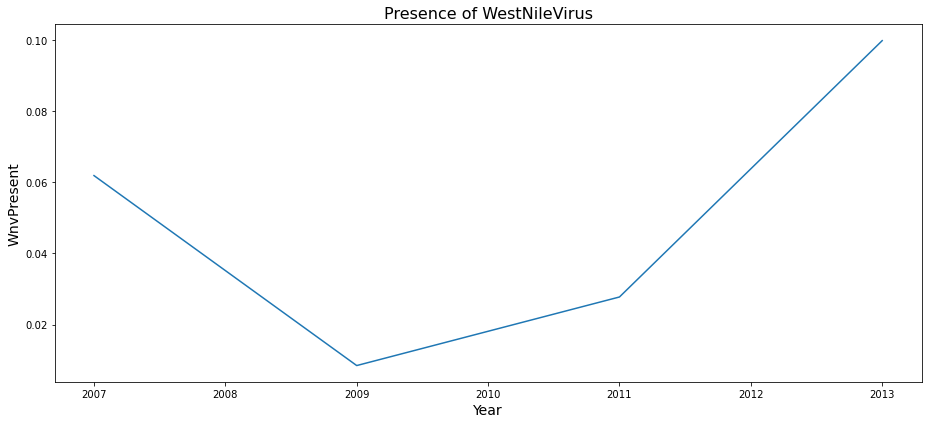

In [67]:
# Persence of wnv vs Year 
plt.figure(figsize=(13,6))
sns.lineplot(x = 'Year_y',y = 'WnvPresent', data = train_full, ci = None, 
             legend = 'full', palette = 'Spectral')
plt.title('Presence of WestNileVirus', fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('WnvPresent',fontsize=14)
#plt.xlim(train_merged.Month.min(), train_merged.Month.max())
plt.tight_layout();

In [68]:
# We can see from the graph, Wnv present increased from 2011 and 2013 which could be the reason 
# why the spraying efforts were made

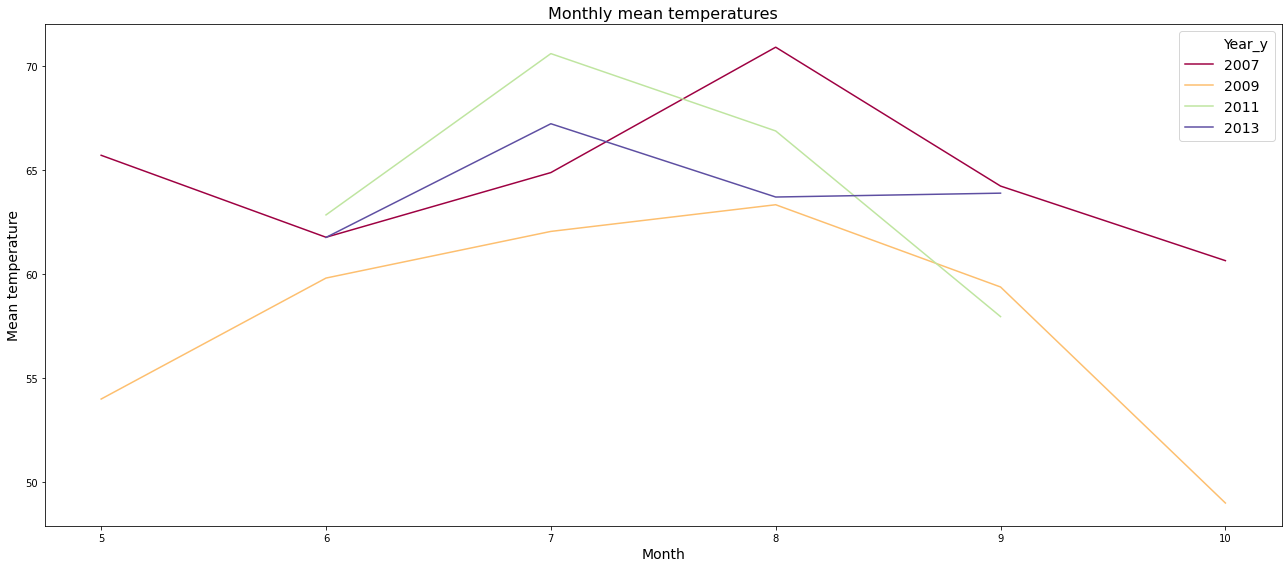

In [69]:
# plot temperature by month and year
plt.figure(figsize=(18,8))
sns.lineplot(x = 'Month_y',y = 'WetBulb', data = train_full, hue = 'Year_y', ci = None, 
             legend = 'full', palette = 'Spectral')
plt.legend(fontsize = 14)
plt.title('Monthly mean temperatures', fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Mean temperature',fontsize=14)
#plt.xlim(weather_combined.month.min(), weather_combined.month.max())
plt.tight_layout()

In [70]:
### This graph represent that the temprature is generally high in the Month of July,Aug and September 

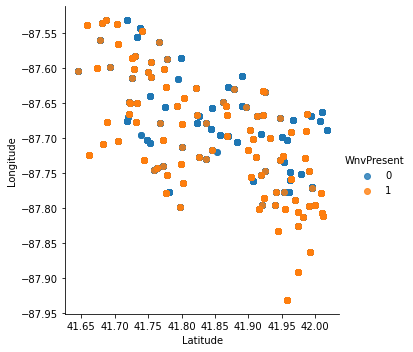

In [71]:
## scatter plot using hue attribute  for colouring out points 
# according to the WnV present 
sns.lmplot(x ='Latitude', y ='Longitude',  
          fit_reg = False, hue = 'WnvPresent', data = train_full);

In [72]:
# This graph shows that the presence of virus is not related to one specific location, it is spread across.

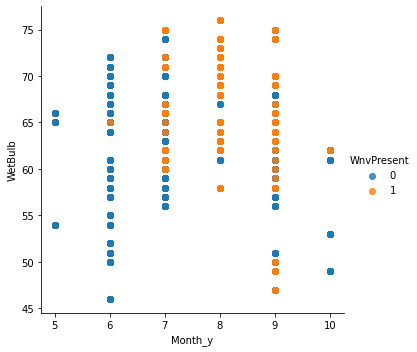

In [73]:
sns.lmplot(x ='Month_y', y ='WetBulb',  
          fit_reg = False, hue = 'WnvPresent', 
          data = train_full); 

In [74]:
# We can observe in the Month of July, Aug and September - Virus is most prectable

In [75]:
## We can see that the presence of virus in mainly during summer to autumn season, month of July-Sep

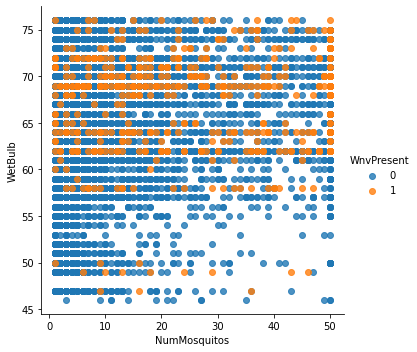

In [76]:
sns.lmplot(x ='NumMosquitos', y ='WetBulb',  
          fit_reg = False, hue = 'WnvPresent', 
          data = train_full);

In [77]:
# Mosquitoes with Virus present are increasing at temperature between 55 and 75 

for index,col in train_full.iterrows():
    if (train_full['WetBulb'][index]>=55) & (train_full['WetBulb'][index]<=75):
        train_full['feature_temp'] = 1
    else:
        train_full['feature_temp'] = 0

In [78]:
# Mosquitoes with Virus present are increasing at temperature between 55 and 75 

for index,col in test_full.iterrows():
    if (test_full['WetBulb'][index]>=55) & (test_full['WetBulb'][index]<=75):
        test_full['feature_temp'] = 1
    else:
        test_full['feature_temp'] = 0

In [79]:
print(train.shape)
display(train_full.head())

(10506, 11)


,AvgSpeed,Date,Day_y,Latitude,Longitude,Month_y,NumMosquitos,PrecipTotal,ResultDir,Species,StnPressure,Trap,WetBulb,WnvPresent,Year_y,stn_ref,feature_temp
0,6.5,2007-05-29,29,41.954690,-87.800991,5,1,0.0,18,CULEX PIPIENS/RESTUANS,29.39,T002,65.0,0,2007,1.0,1
1,6.5,2007-05-29,29,41.954690,-87.800991,5,1,0.0,18,CULEX RESTUANS,29.39,T002,65.0,0,2007,1.0,1
2,6.5,2007-05-29,29,41.994991,-87.769279,5,1,0.0,18,CULEX RESTUANS,29.39,T007,65.0,0,2007,1.0,1
3,6.5,2007-05-29,29,41.974089,-87.824812,5,1,0.0,18,CULEX PIPIENS/RESTUANS,29.39,T015,65.0,0,2007,1.0,1
4,6.5,2007-05-29,29,41.974089,-87.824812,5,4,0.0,18,CULEX RESTUANS,29.39,T015,65.0,0,2007,1.0,1


In [80]:
print(test.shape)
display(test_full.head())

(116293, 10)


,AvgSpeed,Date,Day_y,Id,Latitude,Longitude,Month_y,PrecipTotal,ResultDir,Species,StnPressure,Trap,WetBulb,Year_y,stn_ref,feature_temp
0,10.0,2008-06-11,11,1,41.95469,-87.800991,6,0.0,18,CULEX PIPIENS/RESTUANS,29.28,T002,64.0,2008,1.0,1
1,10.0,2008-06-11,11,2,41.95469,-87.800991,6,0.0,18,CULEX RESTUANS,29.28,T002,64.0,2008,1.0,1
2,10.0,2008-06-11,11,3,41.95469,-87.800991,6,0.0,18,CULEX PIPIENS,29.28,T002,64.0,2008,1.0,1
3,10.0,2008-06-11,11,4,41.95469,-87.800991,6,0.0,18,CULEX SALINARIUS,29.28,T002,64.0,2008,1.0,1
4,10.0,2008-06-11,11,5,41.95469,-87.800991,6,0.0,18,CULEX TERRITANS,29.28,T002,64.0,2008,1.0,1


In [81]:
## OHE for Test and Train dataset- Get Dummies for Species and Trap 
train_full = pd.get_dummies(train_full, columns=['Species','Trap'],drop_first= True)

In [82]:
train_full.shape

(10506, 156)

In [83]:
# OHE for Test dataset - Get Dummies for Species and Trap 
test_full = pd.get_dummies(test_full, columns=['Species','Trap'],drop_first = True)

In [84]:
test_full.shape

(116293, 169)

In [85]:
features_diff = train_full.columns.difference(test_full.columns)

In [86]:
features_diff

Index(['NumMosquitos', 'WnvPresent'], dtype='object')

In [87]:
feat_not_train = test_full.columns.difference(train_full.columns)
feat_not_train

Index(['Id', 'Species_UNSPECIFIED CULEX', 'Trap_T002A', 'Trap_T002B',
       'Trap_T065A', 'Trap_T090A', 'Trap_T090B', 'Trap_T090C', 'Trap_T128A',
       'Trap_T200A', 'Trap_T200B', 'Trap_T218A', 'Trap_T218B', 'Trap_T218C',
       'Trap_T234'],
      dtype='object')

In [88]:
test_full.drop(['Species_UNSPECIFIED CULEX', 'Trap_T002A', 'Trap_T002B',
       'Trap_T065A', 'Trap_T090A', 'Trap_T090B', 'Trap_T090C', 'Trap_T128A',
       'Trap_T200A', 'Trap_T200B', 'Trap_T218A', 'Trap_T218B', 'Trap_T218C',
       'Trap_T234'], axis=1, inplace=True)

In [89]:
#train_merged.to_csv('./data/test_model.csv',index=False)
test_full.to_csv('./data/test_model.csv',index=False)

In [90]:
#train_merged.to_csv('./data/train_model.csv',index=False)
train_full.to_csv('./data/train_model.csv',index=False)